In [1]:
import os
import pickle
import pandas as pd
import signalprocessing as sigp
import seaborn as sn
import soundmfccparams as smfccp

In [2]:
# Path for packs
#signalPath = r"/home/vaclav/Desktop/Diploma/Dirty Signals/Test/Test08/"
signalPath = r"C:/Users/Vaclav/Documents/Diploma/Dirty Signals/Test/Test14"
# Path for RandomForestClassifier
classifierPath = "C:/Users/Vaclav/Documents/Diploma/Notebooks/Classifier/classificator.sav"

In [3]:
# Extracting the dataframes (data characteristics)
signalDataFrame = sigp.extract_data(signalPath)

C:\Users\Vaclav\Documents\Diploma\Notebooks\Classifier\signalprocessing.py:357: RuntimeWarning: divide by zero encountered in log
  return (np.exp((1 / length) * np.sum(np.log(magnitudes)))) / ((1 / length) * np.sum(magnitudes))


In [4]:
#signalDataFrame = smfccp.pca_dataframe(signalDataFrame, 15)
#rng = range(0, int((len(list(signalDataFrame))-1)/2)+1)
#new_cols = ['type_' + str(i) for i in rng] + ['expt_' + str(i) for i in rng]
#signalDataFrame.columns = new_cols[:len(list(signalDataFrame))]
signalDataFrame.to_csv("20200303.csv", sep='\t', encoding='utf-8', index=False)

In [5]:
signalDataFrame = pd.read_csv('C:/Users/Vaclav/Documents/Diploma/Notebooks/Classifier/DataBaseCsv/20200303.csv', sep='\t') 
signalDataFrame

,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,MFCC_0,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,52086.538360,3624.566562,42528.526531,18626.554108,18643.489937,819.180564,2163.360127,3.724820e+06,0.005808,-532.764404,...,-4.635293,1.470587,3.345977,3.835135,8.050520,0.836391,8.619020,-0.547463,4.634605,-1.518312
1,57671.747927,16043.583094,34054.270750,40062.278062,13269.730380,925.167383,2189.854390,3.965686e+06,0.005637,-405.209503,...,-9.914498,6.538100,1.812876,4.974257,6.787773,1.854562,7.842742,-0.938497,6.961234,-3.923347
2,74484.294225,7654.358284,54483.955191,49107.175067,7252.609326,890.075901,2666.740101,4.367598e+06,0.005318,-430.261841,...,-8.257307,4.633691,2.977103,4.162501,8.743237,1.172068,9.070217,-2.021190,6.652027,-4.560872
3,56593.709305,6234.198594,42498.522806,22915.795666,22579.877060,1067.260168,2099.953018,4.040926e+06,0.005623,-435.694458,...,-7.645629,0.840579,4.329916,3.820182,8.195046,2.367659,7.124701,-0.824399,5.346918,-1.638230
4,83123.939630,16705.588923,14975.888285,70078.685308,37694.710826,1255.564303,2532.196499,4.739055e+06,0.004971,-407.051788,...,-9.202333,2.907378,3.322845,-0.589647,9.180792,3.150347,10.440726,-0.396222,4.633700,-3.298366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,59142.068416,6872.153396,53360.776593,23276.447539,3487.120778,879.920647,2225.934572,3.891207e+06,0.005518,-469.758301,...,-5.574024,4.708658,1.288896,3.059761,8.917706,3.289281,9.186320,-2.888414,5.529660,-4.338904
874,62472.773220,6124.701133,51195.078514,33357.944610,5292.843693,956.917031,2233.720851,4.078410e+06,0.005467,-459.590912,...,-6.793699,3.438915,3.006545,4.032516,7.735277,2.648746,8.609316,0.840665,6.112617,-1.785386
875,68647.915350,16216.547658,41305.942139,47433.090767,19656.920555,1229.194244,2147.055625,3.990628e+06,0.005119,-418.697601,...,-7.296759,4.162837,3.438747,5.688816,6.667611,2.347341,7.427891,0.269015,5.631886,-3.187120
876,56176.696446,10789.536597,50319.609886,19429.401275,5602.735253,878.652824,2121.284796,3.626135e+06,0.005643,-441.663727,...,-9.119616,3.787723,2.322132,2.942755,8.024478,1.732031,8.423729,-0.194554,6.189418,-2.963819


In [6]:
# Load the model from disk
loaded_model = pickle.load(open(classifierPath, 'rb'))

In [7]:
# Predicting the classification
predictedData = loaded_model.predict(signalDataFrame)
predictedsignalDataFrame = signalDataFrame.assign(Flag=predictedData)

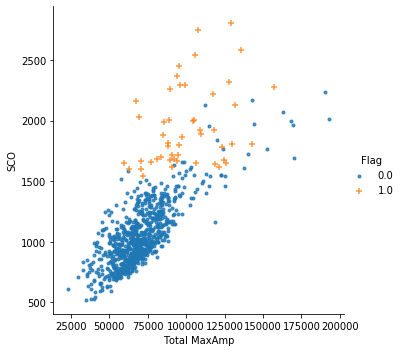

In [8]:
sn.lmplot('Total MaxAmp', 'SCO', data=predictedsignalDataFrame, hue="Flag", fit_reg=False, markers=['.','+'])

In [9]:
# Loading wav files for spectrogramms
audiolist = sigp.load_list_of_wav(signalPath)
temp = audiolist
ppredictedsignalDataFrame = predictedsignalDataFrame.loc[predictedsignalDataFrame['Flag'] == 1]

In [10]:
ppredictedsignalDataFrame.head()

,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,MFCC_0,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,Flag
8,89698.496875,38973.397339,38697.460096,46342.169068,42803.271905,1676.090204,2268.028698,4.737020e+06,0.004635,-336.269073,...,4.865908,3.750217,4.847866,5.149188,4.093884,7.440023,-0.020548,6.740284,-5.448787,1.0
52,97578.073310,22377.604181,27267.693975,77420.311905,44253.839347,1863.253439,2308.134893,5.130156e+06,0.004426,-337.381439,...,5.759101,1.592122,5.369833,7.139657,2.105522,9.035154,-1.919070,7.169012,-4.347888,1.0
62,98998.797857,21436.707880,60459.382055,45996.478625,56828.212585,2296.061998,1622.475101,3.337226e+06,0.003694,-350.616547,...,3.289560,-0.445880,7.005755,6.996078,5.245177,6.005546,-0.718004,4.999532,-4.168638,1.0
96,96194.666364,22467.932635,61466.318284,44142.498708,53321.714026,2292.273080,1661.930908,3.554886e+06,0.003840,-344.189301,...,5.721689,-0.193154,5.558189,5.585027,3.997611,6.444667,-0.007196,6.483766,-2.187618,1.0
101,95403.306340,37691.330431,67387.588306,31608.038737,36354.472801,1801.604679,2422.843497,5.186383e+06,0.004627,-350.248596,...,3.562210,0.052796,3.862298,7.554862,3.582644,9.206180,-0.135806,7.674839,-4.494955,1.0


No handles with labels found to put in legend.


Signal amount is  49
Signal № 8
Time resolution (s) 0.028444444444444446
Frequency resolution (Hz) 35.15625


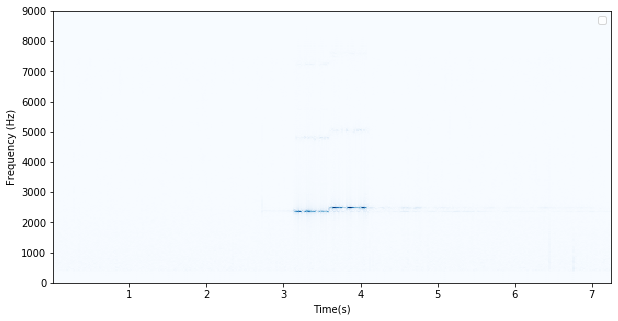

<Figure size 576x432 with 0 Axes>

In [43]:
sigp.plot_all_spectrogramms(audiolist, predictedsignalDataFrame, 512, 0, 1, 1) # last param is activator , 1 - start, 0 - none

In [35]:
audiolist[8].make_audio()

In [33]:
## This method is for wav saving

#sigp.copy_filtered_signal(signalPath, 850)

In [14]:
# Freeing the memory
#del audiolist[:]
#audiolist = None
#del audiolist